Ces instructions permettent de charger les différentes bibliothèques nécessaires à la réalisation de notre exemple.

Remarquez l’import de la bibliothèque Keras à partir de TensorFlow. En effet, Keras est la bibliothèque de haut niveau officielle de développement des réseaux de neurones avec TensorFlow et cela depuis la version 2 de TensorFlow.

Avant la version 2, pour utiliser Keras conjointement avec TensorFlow pour le développement de réseaux de neurones, il aurait fallu installer TensorFlow, puis installer Keras. Mais depuis la version 2 de TensorFlow, une version de Keras a été intégrée à TensorFlow et est dédiée aux développements des réseaux de neurones.

Il ne faut donc pas confondre la bibliothèque Keras, qui peut être utilisée pour le développement de réseaux de neurones conjointement avec TensorFlow ou Theano ou autre framework, et la bibliothèque Keras intégrée à TensorFlow et qui, elle, ne fonctionne qu’avec TensorFlow.

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

2024-02-26 20:59:19.409902: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-26 20:59:19.462610: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 20:59:19.462641: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 20:59:19.464051: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-26 20:59:19.471882: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-26 20:59:19.472615: I tensorflow/core/platform/cpu_feature_guard.cc:1

Le code suivant permet de charger le jeu de données fashion_mnist à partir des datasets présents dans keras.datasets.

In [2]:
fashion_mnist_data = keras.datasets.fashion_mnist
(all_x_train, all_y_train), (x_test, y_test) = fashion_mnist_data.load_data()

all_x_train = all_x_train.astype('float32') 
x_test = x_test.astype('float32')

À la suite de l’exécution de la cellule précédente, nous aurons construit deux jeux de données : un premier jeu de données all_x_train avec ses classes associées all_y_train qui nous servira pour entraîner un réseau de neurones et un deuxième jeu de données x_test avec ses classes associées y_test qui nous servira pour évaluer un réseau de neurones. Également, ces deux jeux de données ont été reformatés avec le type float32.

Les instructions suivantes affichent la taille du jeu de données all_x_train, la taille d’une image de ce jeu de données, le type associé à chaque pixel de ses images et la taille du jeu de données x_test.

In [3]:
print(f"all_x_train.shape = {all_x_train.shape}")
print(f"all_x_train[0].shape = {all_x_train[0].shape}")
print(f"all_x_train[0].dtype = {all_x_train[0].dtype}")

print(f"x_test.shape = {x_test.shape}")


all_x_train.shape = (60000, 28, 28)
all_x_train[0].shape = (28, 28)
all_x_train[0].dtype = float32
x_test.shape = (10000, 28, 28)


Nous avons donc 60 000 images dans le jeu de données all_x_train et chacune de ces images est représentée par une matrice de 28 x 28 dont chaque valeur est de type float32 et nous avons 10 000 images dans le jeu de données x_test.

Le code suivant permet de séparer le jeu de données all_x_train en deux groupes de données pour ainsi avoir un jeu de données à utiliser comme étant les données de validation. Nous allons voir par la suite à quoi vont nous servir ces données de validation.

In [4]:
x_validation, x_train = all_x_train[:5000] / 255.0, all_x_train[5000:] / 255.0
y_validation, y_train = all_y_train[:5000], all_y_train[5000:]

À la suite de l’exécution de la dernière cellule, nous aurons construit les deux nouveaux jeux de données x_validation et x_train. Dans le jeu de données x_validation nous aurons stocké les 5 000 premières images de all_x_train et dans le jeu de données x_train nous aurons stocké les 55 000 images restantes. Le fait de diviser les pixels de toutes ces images par 255 permet de normaliser leurs valeurs.

Les instructions suivantes affichent les mêmes informations que celles affichées précédemment sur le jeu de données all_x_train, mais cette fois les informations affichées concernent les images de x_train.

In [5]:
print(f"x_train.shape = {x_train.shape}")
print(f"x_train[0].shape = {x_train[0].shape}")
print(f"x_train[0].dtype = {x_train[0].dtype}")

x_train.shape = (55000, 28, 28)
x_train[0].shape = (28, 28)
x_train[0].dtype = float32


On voit bien que nous avons 55 000 images dans le jeu de données x_train.

Le code suivant permet de stocker dans la liste fashion_mnist_class_names les vrais noms des produits associés aux images de nos données. En effet, les classes des images indiquées dans les tableaux y_validation, y_train et y_test sont des valeurs entre 0 et 9 et la liste fashion_mnist_class_names va nous permettre d’associer des noms de produits à ces valeurs.

In [6]:
fashion_mnist_class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Le code suivant permet d’afficher une association entre les cinq premières valeurs numériques de x_train avec leurs noms de produits de la liste fashion_mnist_class_names.

In [7]:
for cls in range(5):
    print(cls, ":",fashion_mnist_class_names[y_train[cls]]) 

0 : Coat
1 : T-shirt/top
2 : Sneaker
3 : Ankle boot
4 : Ankle boot


Le code suivant permet d’afficher les deux premières images de x_train avec leur nom de produit.

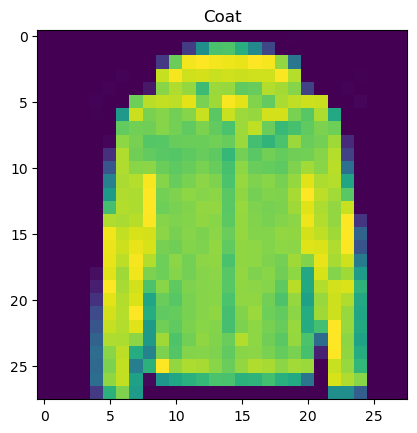

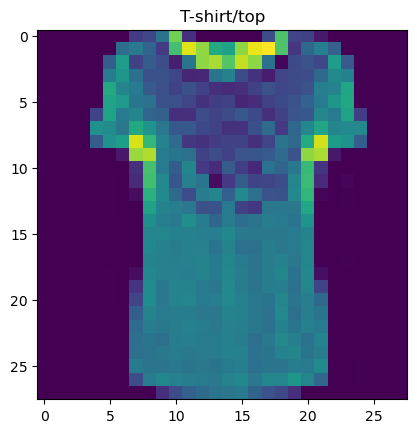

In [8]:
for i in range(2):
    my_img= x_train[i]
    my_img_class = y_train[i]
    my_img_class_name = fashion_mnist_class_names[my_img_class] 
    plt.imshow(my_img)
    plt.title(my_img_class_name)
    plt.show() 

En résumé, à ce stade nous avons construit les trois jeux de données suivants :

    (x_train, y_train) : constitué de 55 000 images avec leurs classes associées et qui sera utilisé pour l’entraînement d’un réseau de neurones.

    (x_validation, y_validation) : constitué de 5 000 images avec leurs classes associées et qui sera utilisé pour évaluer le réseau de neurones à la fin de chaque itération lors de la phase d’entraînement d’un réseau de neurones. 

    (x_test, y_test) : constitué de 10 000 images avec leurs classes associées et qui sera utilisé pour évaluer le réseau de neurones à la fin de toutes les itérations de la phase d’entraînement d’un réseau de neurones.

Pour définir l’architecture de notre réseau de neurones, nous allons utiliser la bibliothèque Keras dans sa version intégrée à TensorFlow.  

Le code suivant permet de définir la structure de notre réseau de neurones.

In [9]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=[28, 28]))
model1.add(keras.layers.Dense(300, activation="relu"))
model1.add(keras.layers.Dense(150, activation="relu"))
model1.add(keras.layers.Dense(10, activation="softmax"))

Ce code commence par créer l’objet model1 avec la classe models.Sequential qui correspond, pour rappel, à un réseau de neurones dont les couches sont connectées les unes aux autres de manière linéaire. Puis nous avons défini pour ce réseau de neurones model1 une couche d’entrée, deux couches cachées et une couche de sortie définies comme suit :

1.La couche d’entrée de type Flatten. Ce type de couche permet d’aplatir les tableaux à deux dimensions qui contient les données sous-jacentes aux images pour les transformer en tableau à une seule dimension. Cette couche de type Flatten, lorsqu’elle reçoit une matrice 28 x 28 valeurs en entrée, produira à sa sortie un tableau de 784 valeurs. L’argument input_shape permet justement de définir la taille des données en entrée. 

2.Deux couches cachées : une première couche cachée avec 300 neurones et avec la fonction d’activation relu suivie d’une deuxième couche cachée avec 150 neurones et également avec la fonction d’activation relu. Ces deux couches cachées sont de type Dense. Le type Dense permet de définir des couches dont les neurones sont connectés à tous les neurones de la couche précédente.

3.La couche de sortie de type Dense et qui est définie avec 10 neurones et la fonction d’activation softmax. Cette couche de sortie a besoin de dix neurones car le modèle de classification que nous sommes en train de développer doit reconnaître la présence dans une image d’un produit parmi dix produits. En d’autres termes, nous souhaitons développer un modèle de classification pour dix classes différentes, donc la dernière couche doit avoir dix neurones. Chacun des dix neurones de la couche de sortie sera entraîné pour reconnaître l’un des dix produits !

Nous n’allons pas entrer dans les détails de la définition des fonctions d’activation relu et softmax car cela n’est pas l’objectif de ce chapitre, cependant il faut savoir que la fonction relu permet d’avoir des couches cachées efficaces et la fonction softmax permet d’obtenir la probabilité du produit qui a le plus de chances d’être celui qui figure dans une image donnée. Généralement, lorsque le problème à résoudre est un problème de classification où le nombre de classes est supérieur à 2 et où nous souhaitons associer une et une seule classe pour chaque image, alors la fonction softmax devrait être utilisée. 

In [10]:
model1.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 282160 (1.08 MB)
Trainable params: 282160 (1.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


À gauche de cette figure, on voit les noms attribués par défaut par TensorFlow aux quatre couches de notre réseau de neurones model1. Ces noms sont flatten, dense, dense_1 et dense_2.

La colonne Output Shape montre le nombre de résultats à la sortie de chaque couche. En résumé, nous avons les 784 poids associés à la sortie de la couche d’entrée flatten puisque, comme mentionné précédemment, cette couche transforme une matrice de 28 x 28 en un tableau à une dimension, les 300 sorties associées aux résultats des 300 neurones de la première couche cachée dense, les 150 sorties associées aux résultats des 150 neurones de la deuxième couche cachée dense_1, et enfin, les 10 sorties associées aux résultats des 10 neurones de la couche de sortie dense_2.

La colonne Param indique le nombre de poids et de biais attachés à chaque couche. Ainsi, la couche d’entrée flatten a 0 poids et biais. La première couche cachée dense a 235 500 poids et biais. En effet, les 784 sorties au niveau de la couche d’entrée flatten sont connectées à chacun des 300 neurones de cette couche cachée dense, ce qui fait 784 * 300 = 235 200 poids auxquels il faut ajouter les 300 biais associés à cette couche, un biais par neurone comme nous l’avons vu au chapitre précédent. Donc, au total, la couche dense aura 235 200 + 300= 235 500 poids !

De même, la couche cachée dense_1 aura 300 * 150 = 45 000 poids issus de la couche cachée précédente plus 150 biais associés à cette couche, ce qui fait un total de 45 150 poids et biais associés à cette deuxième couche cachée dense_1. De la même manière, le nombre de poids et biais de la couche de sortie dense_2 est égal à 150 * 10 + 10 = 1 510.

Une fois que les couches d’un réseau de neurones sont définies, on peut accéder aux informations de chaque couche. L’exemple de code suivant montre comment accéder aux valeurs des poids et aux valeurs des biais de la deuxième couche cachée dense_1

Ce code récupère dans la variable hidden_ la deuxième couche cachée en utilisant la méthode get_layer. Puis la méthode get_weights retourne les poids de cette deuxième couche cachée dans la variable weights et les biais de cette même couche cachée dans la variable biases

In [11]:
hidden_ = model1.get_layer('dense_1')
weights, biases = hidden_.get_weights()
print("Les poids :\n ")
print(weights) 
print(weights.shape)
print("\nLes biais :\n ")
print(biases)
print(biases.shape)

Les poids :
 
[[ 0.0971503  -0.06276421 -0.07359383 ... -0.09492786 -0.09306724
  -0.04942652]
 [ 0.09617344 -0.00970258  0.07928923 ...  0.03497346  0.01526555
  -0.07491544]
 [-0.05127291 -0.04361621  0.06353578 ... -0.0646178  -0.08421732
  -0.05573966]
 ...
 [-0.03122966 -0.06999946  0.07557711 ...  0.02538756  0.009168
   0.11092734]
 [ 0.03401354 -0.07668132  0.08299826 ...  0.08151992  0.04606563
   0.10091698]
 [ 0.06442858 -0.0871415  -0.04963771 ...  0.03228958  0.00048093
  -0.06591557]]
(300, 150)

Les biais :
 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
(150,)


On voit que les poids de cette deuxième couche cachée sont stockés dans un tableau de 300 x 150, c’est-à-dire une matrice. Chaque colonne de cette matrice correspond aux entrées de l’un des 150 neurones de cette couche cachée. 

Les 150 biais de cette couche ont tous été initialisés avec la valeur 0.

En réalité, les biais de toutes les couches sont initialisés par défaut avec la valeur 0.

On peut utiliser les fonctions de tensorflow.keras.initializers afin d’initialiser les poids et les biais des couches d’un réseau de neurones. Par exemple, le code suivant permet de créer un deuxième réseau de neurones model2 avec la même structure que le réseau de neurones model1, mais cette fois les poids et les biais de la deuxième couche cachée de model2 sont initialisés avec des valeurs autres que les valeurs par défaut.

Dans ce code, la variable my_weights_initializer est associée à des poids initialisés avec la fonction RandomNormal qui permet d’obtenir des valeurs distribuées suivant la loi normale centrée avec une moyenne indiquée avec l’argument mean qui est fixé ici à 100 et un écart-type indiqué par l’argument stddev qui est fixé ici à 1.

Également, la variable my_bias_initializer est initialisée avec des valeurs égales à 1, puisque c’est la fonction Ones qui est utilisée.

Lors de la création de la deuxième couche cachée avec la méthode add, la variable my_weights_initializer a été affectée à l’argument kernel_initializer et la variable my_bias_initializer a été affectée à l’argument bias_initializer.

In [12]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[28, 28]))
model2.add(keras.layers.Dense(300, activation="relu"))

my_weights_initializer = tf.keras.initializers.RandomNormal(mean=100., stddev=1.)
my_bias_initializer= tf.keras.initializers.Ones()  
model2.add(keras.layers.Dense(150, activation="relu" ,\
                                  kernel_initializer = my_weights_initializer, \
                                  bias_initializer = my_bias_initializer))
model2.add(keras.layers.Dense(10, activation="softmax"))

model2.summary()
 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 150)               45150     
                                                                 
 dense_5 (Dense)             (None, 10)                1510      
                                                                 
Total params: 282160 (1.08 MB)
Trainable params: 282160 (1.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Cette fois, la deuxième couche cachée est nommée dense_4. Le code suivant permet d’afficher les poids et les biais de cette couche.

In [13]:
hidden_ = model2.get_layer('dense_4')
weights, biases = hidden_.get_weights()
print("Les poids :\n ")
print(weights) 
print(weights.shape)
print("\nLes biais :\n ")
print(biases)
print(biases.shape)

Les poids :
 
[[ 99.60063   98.46609  100.51581  ... 100.87091   99.03558  100.31106 ]
 [ 98.85013   99.58561   99.09982  ...  98.96124   98.6993    99.43793 ]
 [ 98.731064  98.88551   98.57584  ...  98.924576  99.137085 101.61577 ]
 ...
 [101.714066  99.99365   99.30254  ... 100.33371   98.783325  99.90024 ]
 [100.815796 101.301     99.65347  ...  99.544075 100.99166   98.36214 ]
 [ 98.04225   98.94249  101.250946 ... 100.10597   99.55897   99.07951 ]]
(300, 150)

Les biais :
 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
(150,)


On voit dans ces résultats que les poids de la deuxième couche cachée dense_4 sont centrés autour de la valeur 100 et les biais ont été positionnés avec la valeur 1.

Une fois que la structure d’un réseau de neurones est mise en place, avant d’introduire les données dans ce réseau pour entamer la phase d’entraînement, il est nécessaire de le compiler d’abord.

Avec TensorFlow, compiler un réseau de neurones revient à indiquer les trois informations suivantes :

1.La fonction loss à utiliser, c’est-à-dire indiquer comment calculer les erreurs à la sortie de la couche de sortie.

2.Indiquer la méthode d’optimisation à utiliser lors des propagations arrière des erreurs.

3.Les métriques de performance que nous souhaitons utiliser pour mesurer l’efficacité de l’apprentissage du réseau de neurones.

Le code suivant montre un exemple de compilation du réseau de neurones model1 :

In [14]:
model1.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

À la suite de l’exécution de l’instruction précédente, notre réseau de neurones model1 est prêt pour recevoir les données d’entraînement !

Nous n’allons pas entrer dans les détails de toutes les valeurs possibles pour les paramètres loss, optimizer et metrics car ceci dépasse la portée de ce livre. Néanmoins, la fonction sparse_categorical_crossentropy est utilisée comme fonction de calcul de perte lorsque nous avons, comme dans notre exemple, un problème de classification où la classe d’appartenance à la sortie du réseau de neurones est donnée par un vecteur de probabilités. En effet, dans cet exemple, à la sortie de notre réseau de neurones chaque résultat correspond à un vecteur de dix probabilités, une probabilité pour chaque produit d’être le produit présent dans une image.  

À ce stade, l’entraînement de notre réseau de neurones peut être lancé. Pour cela, il suffit d’utiliser la méthode fit comme dans le code suivant :

In [15]:
results = model1.fit(x_train, y_train, epochs=40,\
                    validation_data=(x_validation, y_validation))

Epoch 1/40


2024-02-26 20:59:23.449741: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 8s 4ms/step - loss: 0.7234 - accuracy: 0.7603 - val_loss: 0.5420 - val_accuracy: 0.8114
Epoch 2/40
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4908 - accuracy: 0.8300 - val_loss: 0.4465 - val_accuracy: 0.8500
Epoch 3/40
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4441 - accuracy: 0.8451 - val_loss: 0.4348 - val_accuracy: 0.8460
Epoch 4/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4151 - accuracy: 0.8544 - val_loss: 0.3959 - val_accuracy: 0.8654
Epoch 5/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3959 - accuracy: 0.8619 - val_loss: 0.3779 - val_accuracy: 0.8692
Epoch 6/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3793 - accuracy: 0.8658 - val_loss: 0.3676 - val_accuracy: 0.8702
Epoch 7/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3647 - accuracy: 0.8720 - val_loss: 0.3971 - val_accuracy: 0.8596
Epo

Les deux premiers arguments de la méthode fit indiquent le jeu de données d’entraînement. L’argument epochs indique le nombre d’itérations souhaité pour la phase d’entraînement, qui est fixé ici à 40. Pour rappel, à chaque itération les 55 000 images du jeu de données d’entraînement vont traverser le réseau de neurones. L’argument validation_data indique les données à utiliser à la fin de chaque itération afin d’évaluer les performances du réseau de neurones à la suite de cette itération. L’évaluation du réseau de neurones à la suite de chaque itération sur les données de validation sera calculée en fonction des métriques de performance indiquées avec l’argument metrics lors de la compilation du réseau de neurones.

Chacune des lignes de ces résultats affiche les informations suivantes, en allant de la gauche vers la droite :

    Le numéro de l’itération, par exemple 40/40 pour la dernière itération.

    La progression du passage des données d’entraînement dans le réseau. Cette information est la même pour toutes les lignes des résultats puisque c’est toujours le même nombre de données qui vont traverser le réseau de neurones à chaque itération. Dans notre exemple, lorsque la dernière image traverse le réseau de neurones model1, cette information sera égale à 55 000.

    Le temps consommé par l’itération en cours.

    La valeur de la fonction utilisée pour calculer les erreurs à la sortie du réseau de neurones. Dans notre exemple, cette information est égale à 0.1928 lors de la dernière itération.

    Les valeurs des métriques utilisées pour l’évaluation du réseau de neurones sur les données d’entraînement. Dans notre exemple, nous avons utilisé la métrique accuracy qui est égale à 0.9304 à la fin de la dernière itération.

    Les deux dernières informations correspondent respectivement à la valeur de la fonction de calcul des erreurs et à la valeur du calcul des métriques de performance sur les données de validation. Dans notre exemple, ces deux valeurs sont égales respectivement à 0.3265 et 0.8860.

Cela signifie que notre réseau de neurones parvient à classer correctement 88.60 % des 5 000 images du jeu de données de validation.

Avec les résultats obtenus pendant la phase d’entraînement d’un réseau de neurones, nous pouvons tracer les quatre courbes intéressantes suivantes :

1.La courbe d’évolution de la fonction de calcul des pertes à la sortie du réseau de neurones au fil des itérations par rapport aux données d’entraînement.

2.La courbe d’évolution de la fonction de calcul des pertes à la sortie du réseau de neurones au fil des itérations par rapport aux données de validation.

3.La courbe d’évolution des performances au fil des itérations par rapport aux données d’entraînement.

4.La courbe d’évolution des performances au fil des itérations par rapport aux données de validation.

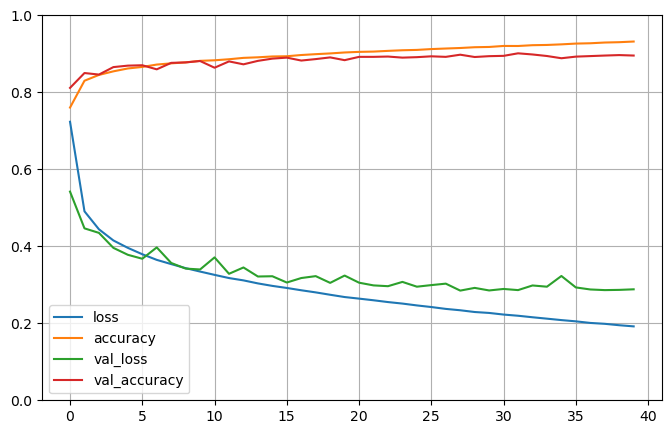

In [16]:
import pandas as pd
pd.DataFrame(results.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  
plt.show()

La figure ci-dessus montre les quatre courbes obtenues suite à l’entraînement précédent du réseau de neurones model1

Sur ces quatre courbes, nous pouvons observer que le calcul des pertes à la sortie du réseau de neurones model1 est en baisse au fur et à mesure des itérations, et ce sur les données d’entraînement et sur les données de validation. Également, le calcul de la métrique de performance accuracy augmente au fur et à mesure des itérations sur les données d’entraînement et également sur les données de validation.  

Une observation qui est également intéressante à faire sur ce graphique est que l’évolution de la métrique accuracy sur les données d’entraînement et celle sur les données de validation sont très similaires, puisque leurs tracés respectifs sont proches l’un de l’autre et se suivent au fil des itérations. Cela indique qu’il y a une très forte probabilité que notre réseau de neurones ne soit pas en situation de surapprentissage.

Le code suivant permet d’évaluer le modèle model1 en utilisant le jeu de données (x_test, y_test).

Ce code commence par la normalisation des données x_test en divisant tous les pixels de chacune des 10 000 images de x_train par 255. Puis l’évaluation du modèle model1 est réalisée via la méthode evaluate appliquée sur les images de x_test et les classes associées à ces images stockées dans y_test.

In [17]:
x_test= x_test/255.0
print("Evaluation du modèle :")
model1.evaluate(x_test, y_test)

Evaluation du modèle :
313/313 [==============================] - 1s 3ms/step - loss: 0.3302 - accuracy: 0.8892


[0.3301997184753418, 0.88919997215271]

Ces résultats montrent que sur le jeu de données de test notre réseau de neurones model1 parvient à classer correctement 88.11 % des images !

Pour les besoins de notre exemple, afin de montrer comment réaliser des prédictions sur des images, nous allons récupérer les sept premières images de x_test et tester les réponses de notre réseau de neurones model1. Pour chacune des sept images, model1 va nous retourner un tableau de dix probabilités !

In [25]:
x_new = x_test[0:7]
y_prob = model1.predict(x_new)
print(f"y_prob :\n{y_prob.round(2)}")
_y_prediction = model1.predict(x_new)
y_prediction=np.argmax(_y_prediction, axis=1)
print(f"\ny_prediction :\n {y_prediction}")



1/1 [==============================] - 0s 29ms/step
y_prob :
[[0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.99]
 [0.   0.   0.99 0.   0.01 0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.06 0.   0.   0.   0.   0.   0.94 0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]]
1/1 [==============================] - 0s 32ms/step

y_prediction :
 [9 2 1 1 6 1 4]


Cette dernière résultat montre que, par exemple pour la première image, notre réseau de neurones prédit pour chacun des dix produits possibles la probabilité d’être celui présent dans cette image. Ainsi, toujours pour cette première image, le réseau de neurones model1 prédit une probabilité proche de la valeur 0 pour les sept premiers produits et également la probabilité 0 pour le produit numéro 8. En revanche, notre réseau de neurones model1 prédit que la première image correspond au produit numéro 7 avec la probabilité de 0.01 et cette même image correspond au produit numéro 9 avec la probabilité 0.99. Justement, c’est parce que pour chaque image notre réseau de neurones associe un vecteur de dix probabilités que nous avons choisi la fonction loss = sparse_categorical_crossentropy.

Afin de comparer les prédictions de notre réseau de neurones avec les vraies valeurs correspondant aux images du jeu de données de test, le code suivant affiche les noms des classes prédites à côté des vrais noms de classes des sept premières images du jeu de données de test :

In [26]:
print(f"       Prédictions : {np.array(fashion_mnist_class_names)[y_prediction]}")
y_truth = y_test[0:7]
print(f"Les vraies classes : {np.array(fashion_mnist_class_names)[y_truth]}")

       Prédictions : ['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt' 'Trouser' 'Coat']
Les vraies classes : ['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt' 'Trouser' 'Coat']


On voit que notre réseau de neurones a prédit correctement les classes des sept premières images de x_test.